# Repasando clase anterior, market beta 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import random

In [2]:
# Get tickers 
tickers = ['VTI', 'BRK-A', 'AMZN']
start_date = '2015-01-01'
end_date = "2024-10-01"

# Descargar precios y graficar
St = yf.download(tickers, start=start_date)['Adj Close']

returns = St.pct_change().dropna()


[*********************100%%**********************]  3 of 3 completed


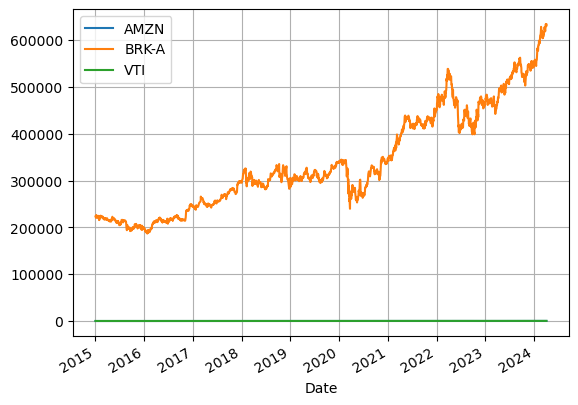

In [3]:
# Normalice Amazon y Berkshiere
St.plot()
plt.grid()

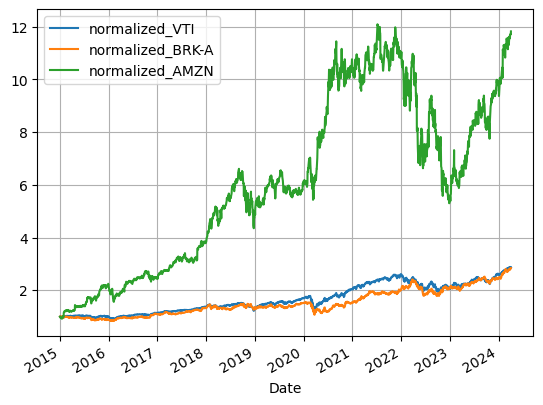

In [4]:
# Grafique Amazon y Berkshiere
St['normalized_VTI'] = St.VTI / St.VTI.iloc[0]
St['normalized_BRK-A'] = St['BRK-A'] / St['BRK-A'].iloc[0]
St['normalized_AMZN'] = St.AMZN / St.AMZN.iloc[0]

St[['normalized_VTI', 'normalized_BRK-A', 'normalized_AMZN']].plot()
plt.grid()

### Calcule la beta de Berkshiere

$$BRK = \beta_0 + \beta_1 * VTI $$

In [5]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
X = returns[['VTI']]
y = returns[['BRK-A']]

model.fit(X, y)
print(model.coef_)

[[0.79480796]]


In [6]:
predictions_berkshiere = model.predict(X)

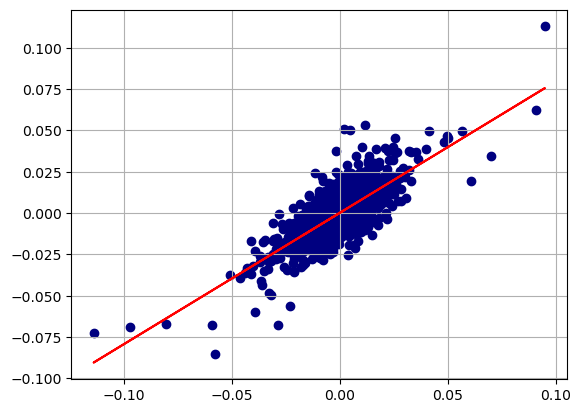

In [7]:
# Grafique las predicciones
plt.scatter(X,y, c = 'navy')
plt.plot(X, predictions_berkshiere, c = 'red')
plt.grid()

In [8]:
# Obtenga el R2
error_modelo = np.var(predictions_berkshiere - y)
error_promedio = np.var(y - np.mean(y))

C:\Users\luism\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [9]:
(error_promedio - error_modelo) / error_promedio

BRK-A    0.586202
dtype: float64

In [10]:
# Obtenga el r2 con el paquete
from sklearn.metrics import r2_score
r2_score(y_pred=predictions_berkshiere, y_true = y)

0.5862021691792108

### Calcule la beta de Amazon 

In [22]:
model = LinearRegression()
X = returns[['VTI']]
y = returns[['AMZN']]

model.fit(X, y)
print(model.coef_)

[[1.11528712]]


In [23]:
predictions_amazon = model.predict(X)

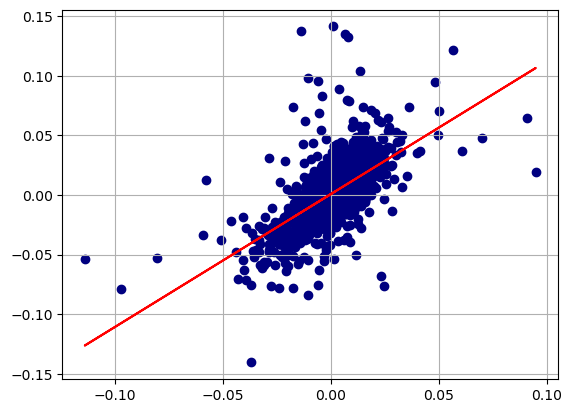

In [24]:
# Grafique la beta de Amazon 
plt.scatter(X, y, c = 'navy')
plt.plot(X, predictions_amazon, c = 'red')
plt.grid()

In [25]:
# Obtenga el R2 de Amazon 
r2_score(y_true = y, y_pred=predictions_amazon)

0.38080293396280107

### CAPM 

Capital asset pricing model / Modelo de valoración de activos financieros 

1- En realidad los inversionistas se interesan por el _risk premium_ que es el diferencial entre el riesgo que están tomando y el rendimiento libre de riesgo (si una inversión me da menos que CETES, mejor ni me meto)

2- En un monto donde lo único que importa para  predecir el rendimiento de un activo es la beta y el $R^2$ es igual a 1, esta igualdad se tiene que cumplir:


$$\frac{E(R_i) - rf}{\beta_i} = E(R_m) - Rf$$


In [26]:
### Ejemplo
rf = 0.05
activo = 0.11
mercado = 0.1

In [27]:
# Calcule la prima de riesgo del mercado
prima_mercado = mercado - rf
prima_mercado

0.05

In [28]:
# Calcule la prima de riesgo del activo
prima_activo = activo - rf
prima_activo

0.06

In [29]:
## Las primas no son iguales
prima_activo == prima_mercado

False

In [18]:
## Si lo unico que importa es la beta y es un factor de escala, en realidad peudo escribir esta ecuación así

$$\frac{0.06}{\beta} = 0.05$$  

In [31]:
## Despejando
beta = 0.06/0.05
beta

1.2

Despejando, podemos concluir esto:

$$E[r_i] = rf + \beta * (E[m] - rf) $$

In [33]:
capm = rf + beta*(mercado - rf)
capm

0.11

In [34]:
### Ejemplo: ¿cuál es el valor esperado del rendimiento anual de Amazon en los siguientes 5 años?

rf = 0.035
beta_amazon = 1.11
market_return = 0.09

capm_amzn = rf + beta_amazon*(market_return - rf)
capm_amzn

0.09605

### Problema 1 del CAPM

1- Como hemos visto en estas dos últimas clases (y verán en su tarea), market beta no explica en un 100% la variación


2- Market beta puede cambiar con el tiempo

In [36]:
# Get tickers 
tickers = ['VTI', 'BRK-A', 'AMZN', 'VGT']
start_date = '2015-01-01'
end_date = "2024-10-01"

# Descargar precios y graficar
St = yf.download(tickers, start=start_date)['Adj Close']

returns = St.pct_change().dropna()

[*********************100%%**********************]  4 of 4 completed


In [39]:
returns['date'] = returns.index
returns['year'] = [i.year for i in returns.date]

In [41]:
years = [2015,2016,2017,2018,2019,2020,2021,2022,2023,2024]

betas = []
r2 = []

for i in years:
    flag_frame = returns.query('year == @i')
    model = LinearRegression()
    X = flag_frame[['VTI']]
    y = flag_frame[['VGT']]
    model.fit(X,y)
    # Beta
    beta = model.coef_[0][0]
    betas.append(beta)
    # r2
    predicciones = model.predict(X)
    r2i = r2_score(y_true = y, y_pred = predicciones)
    r2.append(r2i)

In [42]:
df = pd.DataFrame()
df['beta'] = betas
df['r2'] = r2
df

,beta,r2
0,1.082923,0.868034
1,1.112192,0.821969
2,1.230207,0.598641
3,1.313285,0.886136
4,1.327906,0.866077
5,1.089196,0.897164
6,1.283895,0.780831
7,1.317159,0.934072
8,1.222479,0.772199
9,1.489146,0.794550


In [43]:
years = [2015,2016,2017,2018,2019,2020,2021,2022,2023,2024]

betas = []
r2 = []

for i in years:
    flag_frame = returns.query('year == @i')
    model = LinearRegression()
    X = flag_frame[['VTI']]
    y = flag_frame[['AMZN']]
    model.fit(X,y)
    # Beta
    beta = model.coef_[0][0]
    betas.append(beta)
    # r2
    predicciones = model.predict(X)
    r2i = r2_score(y_true = y, y_pred = predicciones)
    r2.append(r2i)

In [44]:
df = pd.DataFrame()
df['beta'] = betas
df['r2'] = r2
df

,beta,r2
0,1.123083,0.261060
1,1.055149,0.229616
2,1.177834,0.153992
3,1.660535,0.592798
4,1.302132,0.513823
5,0.667406,0.352859
6,0.985537,0.310558
7,1.602295,0.634437
8,1.443316,0.349387
9,1.579358,0.464637


In [45]:
years = [2015,2016,2017,2018,2019,2020,2021,2022,2023,2024]

betas = []
r2 = []

for i in years:
    flag_frame = returns.query('year == @i')
    model = LinearRegression()
    X = flag_frame[['VTI']]
    y = flag_frame[['BRK-A']]
    model.fit(X,y)
    # Beta
    beta = model.coef_[0][0]
    betas.append(beta)
    # r2
    predicciones = model.predict(X)
    r2i = r2_score(y_true = y, y_pred = predicciones)
    r2.append(r2i)


df = pd.DataFrame()
df['beta'] = betas
df['r2'] = r2
df

,beta,r2
0,0.867335,0.679100
1,0.775700,0.551994
2,0.935751,0.356489
3,1.034024,0.615280
4,0.861738,0.533537
5,0.819173,0.736025
6,0.622296,0.297072
7,0.700564,0.613089
8,0.673522,0.392242
9,0.434688,0.162072


Amazon ha tenido muchos años de beta poisitivo, pero algunos años han sido de beta bajo

### Teorícamente tiene mucho sentido pensar en market beta, es un hecho que existen acciones sensibles al estado del mercado, el problema es que el mundo y las betas cambian.

A pesar de que es cierto que los rendimientos de un portafolio a largo plazo dependen de su beta, no sabemos como pronosticar el beta futuro. 



### Sin embargo, este modelo CAPM es un muy buen modelo mentar para entender como funciona el mercado.